# Linear Regression

Thanks to UDSclub 

Based on https://github.com/udsclub/udscourse/blob/master/lectures/2.0%20-%20Linear%20Models.ipynb

In [1]:
# plot graphics in the notebook 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# make experiments reproducible
np.random.seed(999)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 16, 10
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [2]:
# method for data generation
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # create 1000 points uniformly distibuted in closed intervl from 0 to 2*pi
    # it is some kind of resolution for sampling
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # calculate sine values
    data['values'] = np.sin(data['support']) + 1
    # choose n_train random vakues from support (with replacement) and sort them ascending
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # calculate sine for each of samplesd point
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

# method for linear data generation
def generate_linear_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # create 1000 points uniformly distibuted in closed intervl from 0 to 2
    # it is some kind of resolution for sampling
    data['support'] = np.linspace(0, 2, num=n_support)
    # calculate sine values
    data['values'] = data['support']
    # choose n_train random values from support (with replacement) and sort them ascending
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # calculate sine for each of samplesd point
    data['y_train'] = data['x_train'] + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data



In [3]:
# sample 25 points from 1000 available from noised sin manifold 
data = generate_wave_set(1000, 25)
data = generate_linear_set(1000, 25)
print('Shape of X is', data['x_train'].shape)
print('Head of X is', data['x_train'][:10])

Shape of X is (25,)
Head of X is [0.14214214 0.15615616 0.22422422 0.28628629 0.28628629 0.3003003
 0.36436436 0.58858859 0.66266266 0.66866867]


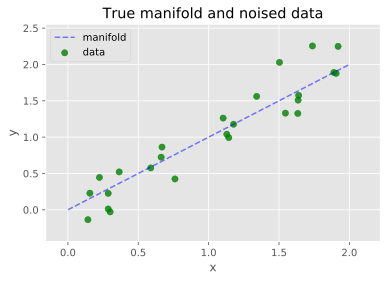

In [4]:
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper left')
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
# add column of ones to the first position
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
print('Top rows of X')
print(X[:5, :])

Top rows of X
[[1.         0.14214214]
 [1.         0.15615616]
 [1.         0.22422422]
 [1.         0.28628629]
 [1.         0.28628629]]


In [6]:
# linear algebra magic of numpy
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])

In [7]:
print('Fitted params')
print(w)

Fitted params
[-0.09361478  1.09798799]


In [8]:
y_hat = np.dot(w, X.T)

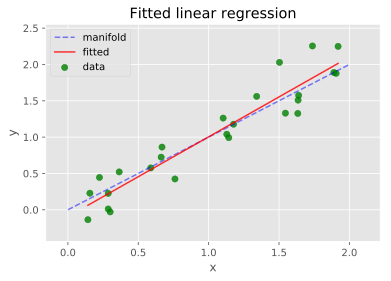

In [9]:
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper left')
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
np.mean((data['y_train'] - y_hat)**2)

0.052988424819755305

# Polynomial Regression
$$\large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(x\right) &=& w_0 + w_1 x + w_1 x^2 + \cdots + w_n x^p \\
&=& \sum_{i=0}^p w_i x^i
\end{array}$$



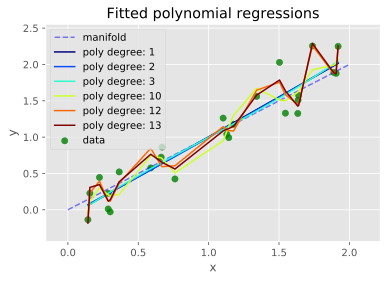

In [11]:
# define list with degrees of polynomials to investigate
degree_list = [1, 2, 3, 10, 12, 13]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

# save weights of all fitted polynomial regressions
w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # list with polynomial features for each degree
    dlist = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    q, r = np.linalg.qr(X)
    w = np.dot(np.dot(np.linalg.inv(r), q.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper left')
plt.title('Fitted polynomial regressions')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [12]:
for p, e in zip(degree_list, err):
    print(p, e)

1 0.052988424819755305
2 0.05293529667555521
3 0.05277592472036452
10 0.04006965228090675
12 0.01915791721327105
13 0.01727756742470947


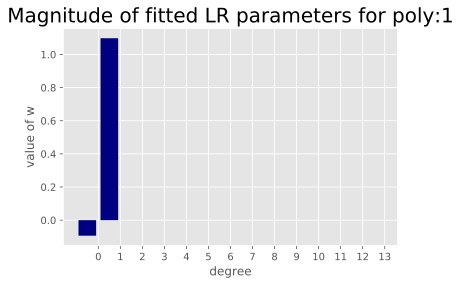

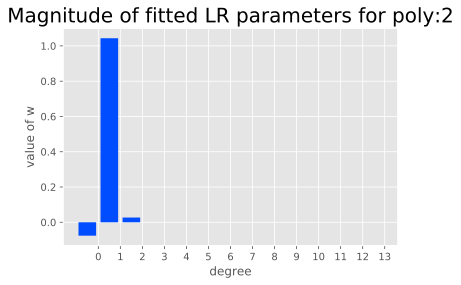

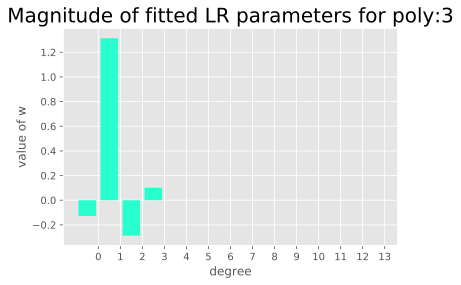

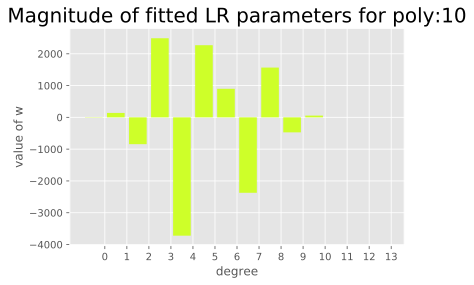

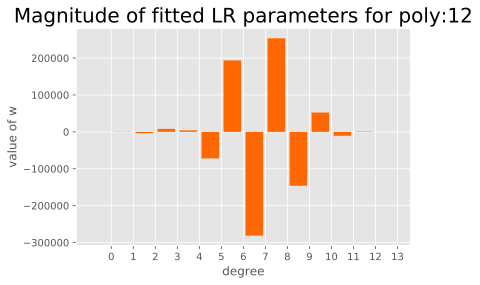

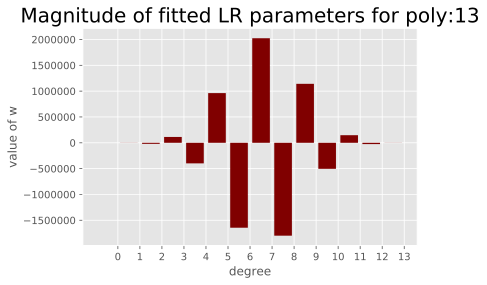

In [13]:
for ix, t in enumerate(w_list):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i' % degree, fontsize=20)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

In [14]:
for p, e in zip(degree_list, err):
    print(p, e)

1 0.052988424819755305
2 0.05293529667555521
3 0.05277592472036452
10 0.04006965228090675
12 0.01915791721327105
13 0.01727756742470947
